In [2]:
import sys
sys.path.append('D:/v1ktop/Drive/REPOS/augmentation_ap/')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
from preprocesing.load_datasets import Dataset

In [6]:
from classifier.FeactureExtraction import feature_extraction

In [7]:
data=Dataset(key="anorexia18_dev", encode=False, remove_end=True)

In [8]:
original_training=data.get_dataset(folder_name="prep_chunks_filtered", truth_name="train_golden_truth_filtered.txt",
                partition="training")

In [9]:
docs_positive_class=[]

In [10]:
for i in range(len(original_training[0])):
    if(original_training[1][i]==1):
        docs_positive_class.append(original_training[0][i])
        

In [11]:
cv = CountVectorizer(binary=True )

In [12]:
def get_docs_difference(augmentation_method="Xi", augmentation_test="", n_docs=[1], original_vocab=None, original_data=None, both=False):
    differences=[]
    for n in n_docs:
        diff=[]
        diff.append(n)
        prefix=augmentation_method+str(n)
        folder=augmentation_method+augmentation_test+"/"+prefix
        truth_file=augmentation_method+augmentation_test+"/"+prefix+".txt"
        training_a= data.get_dataset(folder_name=folder, truth_name=truth_file,
                                     partition="augmented")
        if both:
            cv.fit_transform(np.append(training_a[0], original_data))
            #print(len(cv.stop_words_))
        else:
            cv.fit_transform(training_a[0])
            #print(len(cv.stop_words_))

        voc_aug=set(cv.vocabulary_.keys())
        voc_diff=voc_aug-original_vocab
        diff.append(len(original_vocab))
        diff.append(len(voc_aug))
        diff.append(len(voc_diff))
        differences.append(diff)
    return differences 

In [13]:
cv.fit_transform(docs_positive_class)

<61x23411 sparse matrix of type '<class 'numpy.int64'>'
	with 108621 stored elements in Compressed Sparse Row format>

In [14]:
original_voc=set(cv.vocabulary_.keys())

## Tamaño de los vocabularios segun el numero de nuevos documentos y el porcentaje modificado- Clase positiva 

### Xi

In [15]:

n_docs=[i for i in range(1,11)]

In [16]:
xi_diff=get_docs_difference(augmentation_method="Xi", n_docs=n_docs, 
                            original_vocab=original_voc, both=False)

In [17]:
xi_diff[1]

[2, 23411, 25735, 2355]

In [18]:
df1 = pd.DataFrame(xi_diff)
df1.columns = ["n", "original", "augmento", "dif"]

In [19]:
xi_by_n=df1.groupby("n").mean()

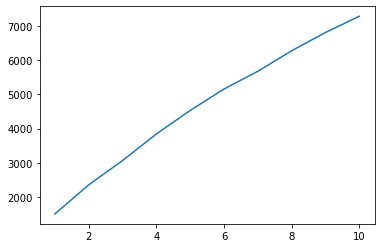

In [20]:
plt.plot(xi_by_n["dif"])

### Thesauro

In [21]:
rand_diff=get_docs_difference(augmentation_method="Thesaurus", n_docs=n_docs,
                    original_vocab=original_voc)

In [22]:
rand_df = pd.DataFrame(rand_diff)
rand_df.columns = ["n", "original", "augmentado", "dif"]


In [23]:
rand_df_n=rand_df.groupby("n").mean()

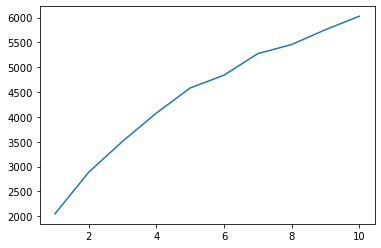

In [24]:
plt.plot(rand_df_n["dif"])

## $Rel_1$

In [25]:
l1_diff=get_docs_difference(augmentation_method="Rel_1", n_docs=n_docs,
                    original_vocab=original_voc, both=False)

In [26]:
l1_diff[1]

[2, 23411, 26424, 3037]

In [27]:
dfl1 = pd.DataFrame(l1_diff)
dfl1.columns = ["n", "original", "augmento", "dif"]

In [28]:
l1_by_n=dfl1.groupby("n").mean()

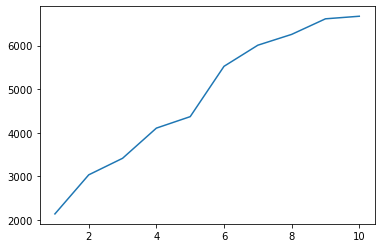

In [29]:
plt.plot(l1_by_n["dif"])

## $Context_0$

In [30]:
negative_class=[]
for i in range(len(original_training[0])):
    if(original_training[1][i]==0):
        negative_class.append(original_training[0][i])

In [31]:
cv.fit_transform(negative_class)

<405x76029 sparse matrix of type '<class 'numpy.int64'>'
	with 678522 stored elements in Compressed Sparse Row format>

In [32]:
len(cv.vocabulary_.keys())

76029

In [33]:
analogy_diff=get_docs_difference(augmentation_method="Rel_0", n_docs=n_docs,
                    original_vocab=original_voc, both=False)

In [34]:
df_analogy = pd.DataFrame(analogy_diff)
df_analogy.columns = ["n", "original", "augmentado", "dif"]

In [35]:
l0_by_n=df_analogy.groupby('n').mean()

In [36]:
l0_by_n

,original,augmentado,dif
n,,,
1,23411,40956,25418
2,23411,43746,27795
3,23411,45048,28927
4,23411,46382,30147
5,23411,47258,30871
6,23411,47951,31522
7,23411,48814,32333
8,23411,49252,32709
9,23411,49956,33337


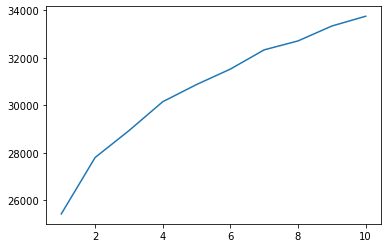

In [37]:
plt.plot(l0_by_n["dif"])

## Metodos y aumentos

In [68]:
x1=xi_by_n["dif"].to_numpy()

In [69]:
x2=rand_df_n["dif"].to_numpy()

In [70]:
x3=l0_by_n["dif"].to_numpy()

In [71]:
x4=l1_by_n["dif"].to_numpy()

In [72]:
x_eje=n_docs

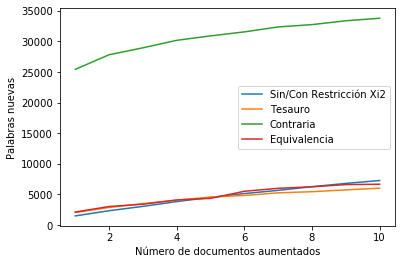

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [73]:
beingsaved = plt.figure()
plt.plot(x_eje, x1)
plt.plot(x_eje,x2)
plt.plot(x_eje,x3)
plt.plot(x_eje,x4)
plt.legend(["Sin/Con Restricción Xi2", "Tesauro", "Contraria", "Equivalencia",])
plt.xlabel('Número de documentos aumentados')
plt.ylabel('Palabras nuevas')
plt.show()
beingsaved.savefig("pos_plot_anox.eps", format="eps")

## Tamaño de los vocabularios segun el numero de nuevos documentos y el porcentaje modificado. Ambas clases

In [44]:
cv.fit_transform(original_training[0])
original_voc_both=set(cv.vocabulary_.keys())

### Xi

In [45]:
xi_diff=get_docs_difference(augmentation_method="Xi", n_docs=n_docs,
                    original_vocab=original_voc_both, both=True,
                            original_data=original_training[0])

In [46]:
df = pd.DataFrame(xi_diff)
df.columns = ["n", "original", "augmentado", "dif"]

In [47]:
by_n_xi_diff=df.groupby("n").mean()

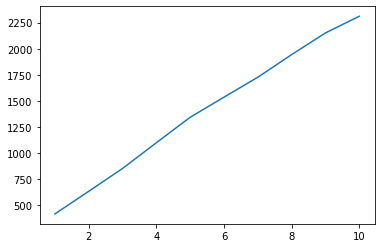

In [48]:
plt.plot(by_n_xi_diff["dif"])

### Thesaurus

In [49]:
rand_diff=get_docs_difference(augmentation_method="Thesaurus", n_docs=n_docs,
                    original_vocab=original_voc_both, both=True, original_data=original_training[0])

In [50]:
df_rand_diff = pd.DataFrame(rand_diff)
df_rand_diff.columns = ["n", "original", "augmented", "dif"]


In [51]:
df_rand_diff_by_n=df_rand_diff.groupby("n").mean()

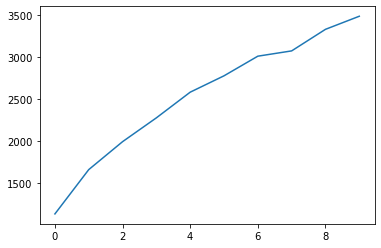

In [52]:
plt.plot(df_rand_diff["dif"])

## $Context_1$

In [53]:
l1_diff_both=get_docs_difference(augmentation_method="Rel_1", n_docs=n_docs,
                    original_vocab=original_voc_both, both=True,
                            original_data=original_training[0])

In [54]:
df_l1_both = pd.DataFrame(l1_diff_both)
df_l1_both.columns = ["n", "original", "augmentado", "dif"]

In [55]:
by_n_l1_diff=df_l1_both.groupby("n").mean()

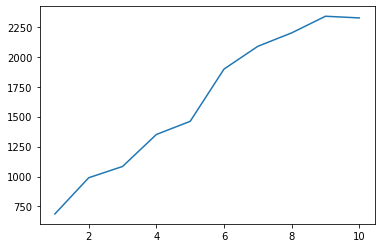

In [56]:
plt.plot(by_n_l1_diff["dif"])

## $Context_0$

In [57]:
analogy_diff2=get_docs_difference(augmentation_method="Rel_0", n_docs=n_docs,
                    original_vocab=original_voc_both, both=True,
                                  original_data=original_training[0])

In [58]:
df_an_diff = pd.DataFrame(analogy_diff2)
df_an_diff.columns = ["n","original", "augmented", "dif"]

In [59]:
df_an_diff_by_n=df_an_diff.groupby("n").mean()

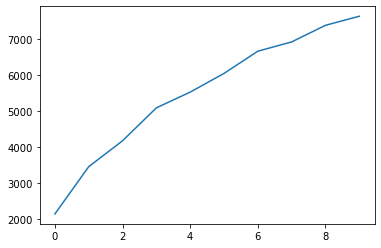

In [60]:
plt.plot(df_an_diff["dif"])

## Resumen

In [116]:
x1=by_n_xi_diff["dif"].to_numpy()

In [117]:
x2=df_rand_diff_by_n["dif"].to_numpy()

In [118]:
x3=df_an_diff_by_n["dif"].to_numpy()

In [119]:
x4=by_n_l1_diff["dif"].to_numpy()

In [120]:
x_eje=n_docs

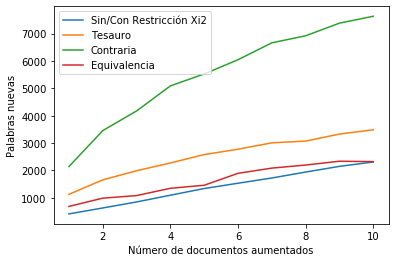

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [122]:
begin_save2=plt.figure()
plt.plot(x_eje, x1)
plt.plot(x_eje,x2)
plt.plot(x_eje,x3)
plt.plot(x_eje,x4)
plt.legend(["Sin/Con Restricción Xi2", "Tesauro", "Contraria", "Equivalencia",])
plt.xlabel('Número de documentos aumentados')
plt.ylabel('Palabras nuevas')
plt.show()
begin_save2.savefig("both_plot_anox.eps", format="eps")